                                    Davis Paper Analysis

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
# Load RTT data
rtt_data = pd.read_csv("rtt-log.txt", sep="\t", header=None, names=["Time", "Flow", "OldRTT", "NewRTT"])
rtt_data["OldRTT"] = rtt_data["OldRTT"].str.extract(r"(\d+)").astype(int)
rtt_data["NewRTT"] = rtt_data["NewRTT"].str.extract(r"(\d+)").astype(int)
rtt_data["Flow"] = rtt_data["Flow"].str.extract(r"(\d+)").astype(int)

# Load Throughput data
throughput_data = pd.read_csv("throughput-log.txt", sep=" ", header=None, names=["Time", "Flow", "Throughput"])

In [135]:
# Filter data for plotting
rtt_flow0 = rtt_data[rtt_data["Flow"] == 0]
rtt_flow1 = rtt_data[rtt_data["Flow"] == 1]

throughput_flow0 = throughput_data[throughput_data["Flow"] == 0]
throughput_flow1 = throughput_data[throughput_data["Flow"] == 1]

In [136]:
# Find mean New RTT of each flow
mean_rtt_flow0 = rtt_flow0["NewRTT"].mean()
mean_rtt_flow1 = rtt_flow1["NewRTT"].mean()

print("Mean RTT for Flow 0: ", mean_rtt_flow0)
print("Mean RTT for Flow 1: ", mean_rtt_flow1)

Mean RTT for Flow 0:  111.55121470781353
Mean RTT for Flow 1:  142.8317337387751


In [137]:
# Find the min RTT for the flows
min_rtt_flow0 = rtt_flow0["NewRTT"].min()
min_rtt_flow1 = rtt_flow1["NewRTT"].min()

print("Min RTT for Flow 0: ", min_rtt_flow0)
print("Min RTT for Flow 1: ", min_rtt_flow1)

Min RTT for Flow 0:  30
Min RTT for Flow 1:  60


In [138]:
# Find mean Throughput of each flow
mean_throughput_flow0 = throughput_flow0["Throughput"].mean()
mean_throughput_flow1 = throughput_flow1["Throughput"].mean()

print("Mean Throughput for Flow 0: ", mean_throughput_flow0)
print("Mean Throughput for Flow 1: ", mean_throughput_flow1)

Mean Throughput for Flow 0:  2.4866064040066775
Mean Throughput for Flow 1:  2.0449285809682802


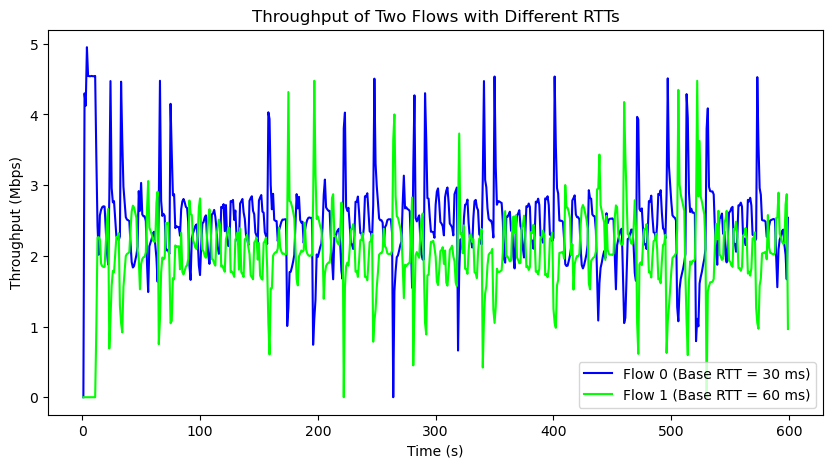

In [139]:
# Create Figure 6: Throughput over Time
plt.figure(figsize=(10, 5))
plt.plot(throughput_flow0["Time"], throughput_flow0["Throughput"], label="Flow 0 (Base RTT = 30 ms)", color="blue")
plt.plot(throughput_flow1["Time"], throughput_flow1["Throughput"], label="Flow 1 (Base RTT = 60 ms)", color="lime")
plt.title("Throughput of Two Flows with Different RTTs")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.savefig("One.png")
plt.show()

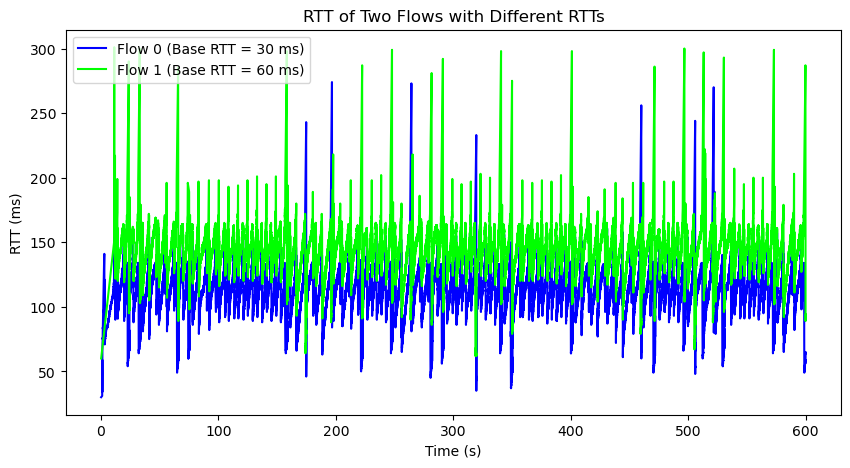

In [140]:
# Create Figure 7: RTT over Time
plt.figure(figsize=(10, 5))
plt.plot(rtt_flow0["Time"], rtt_flow0["NewRTT"], label="Flow 0 (Base RTT = 30 ms)", color="blue")
plt.plot(rtt_flow1["Time"], rtt_flow1["NewRTT"], label="Flow 1 (Base RTT = 60 ms)", color="lime")
plt.title("RTT of Two Flows with Different RTTs")
plt.xlabel("Time (s)")
plt.ylabel("RTT (ms)")
plt.legend()
plt.savefig("Two.png")
plt.show()

In [141]:
throughput_data.to_csv("throughput-data.csv", index=False)

In [142]:
total_throughput = throughput_data.groupby('Time')['Throughput'].sum()
total_throughput.to_csv("total_throughput.csv", index=True)

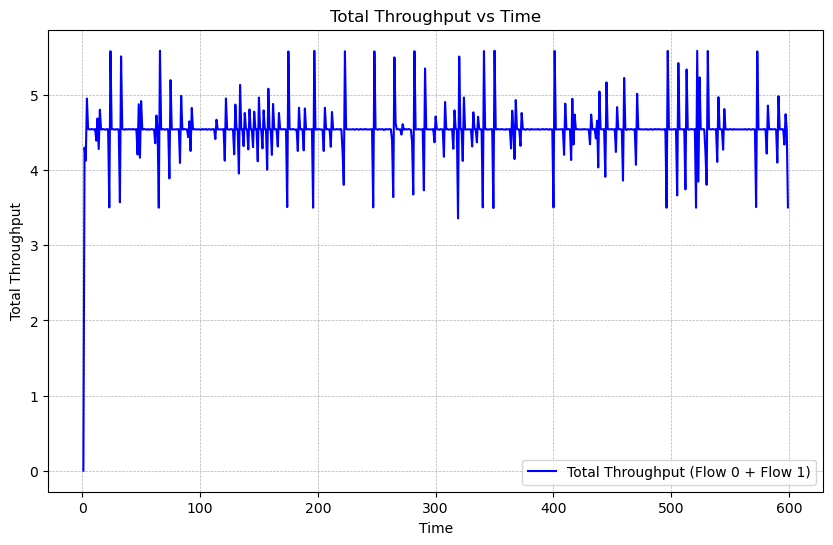

In [143]:
# Step 3: Plot the total throughput vs time
plt.figure(figsize=(10, 6))
plt.plot(total_throughput.index, total_throughput.values, label='Total Throughput (Flow 0 + Flow 1)', color='blue')
plt.xlabel('Time')
plt.ylabel('Total Throughput')
plt.title('Total Throughput vs Time')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()